<a href="https://colab.research.google.com/github/nazarcoder123/Yes_Bank-Stock-Prediction-Using-XGBOOST/blob/main/Yes_Bank_Stock_Prediction_using_XGBOOST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import accuracy_score,r2_score,mean_squared_error,mean_absolute_error
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor
from xgboost import XGBRegressor

In [8]:
df = pd.read_csv("/content/data_YesBank_StockPrices.csv")

In [9]:
df.head()

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41


In [10]:
df.shape

(185, 5)

In [11]:
df.isnull().sum()

Date     0
Open     0
High     0
Low      0
Close    0
dtype: int64

In [12]:
x = df.iloc[:,1:4]
y = df.iloc[:,-1]

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    185 non-null    object 
 1   Open    185 non-null    float64
 2   High    185 non-null    float64
 3   Low     185 non-null    float64
 4   Close   185 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.4+ KB


In [14]:
df.describe()

,Open,High,Low,Close
count,185.000000,185.000000,185.000000,185.000000
mean,105.541405,116.104324,94.947838,105.204703
std,98.879850,106.333497,91.219415,98.583153
min,10.000000,11.240000,5.550000,9.980000
25%,33.800000,36.140000,28.510000,33.450000
50%,62.980000,72.550000,58.000000,62.540000
75%,153.000000,169.190000,138.350000,153.300000
max,369.950000,404.000000,345.500000,367.900000


<ipython-input-15-b7090897418d>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.drop(columns="Date"))


<Axes: ylabel='Density'>

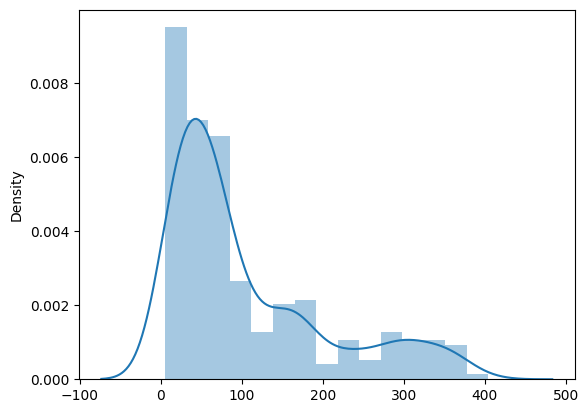

In [15]:
sns.distplot(df.drop(columns="Date"))

In [16]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [17]:
mms = MinMaxScaler()
x_train_mms = mms.fit_transform(x_train)
x_test_mms = mms.transform(x_test)

In [18]:
x = XGBRegressor()
x.fit(x_train_mms,y_train)
y_pred = x.predict(x_test_mms)
r2_score(y_pred,y_test)

0.965894377822361

In [19]:
cross_val_score(x,x_train_mms,y_train,cv=5).mean()

0.9848257798579219

In [20]:
rf = RandomForestRegressor()
rf.fit(x_train_mms,y_train)
y_pred1 = rf.predict(x_test_mms)
r2_score(y_pred1,y_test)

0.9754396503061356

In [21]:
cross_val_score(rf,x_train_mms,y_train,cv=5).mean()

0.984349775258524

In [22]:
comparison_df = pd.DataFrame({'Actual Prices': y_test, 'Predicted Prices': y_pred})

# Print the DataFrame
print(comparison_df)

     Actual Prices  Predicted Prices
19           28.63         32.143654
42           12.24         12.344213
156         367.90        318.255981
111         136.83        111.794174
148         306.80        315.994659
15           22.78         19.546337
24           37.93         41.064087
68           61.98         65.015465
117         167.96        171.893372
98           57.50         70.762032
97           48.65         49.016376
163         231.20        187.298050
69           61.02         63.501125
175          34.55         42.798332
45           15.45         13.831640
16           25.32         18.854942
51           47.31         47.308922
35           22.85         33.359455
82           66.02         63.408173
56           50.97         47.344067
165         168.00        179.929474
124         153.30        156.941086
146         350.00        318.255981
30           50.54         49.843533
9            19.49         19.546337
126         149.38        141.975739
6